In [ ]:
# 安装依赖（首次运行）
!pip install evaluate bert_score rouge_score nltk --quiet



🚀 Round 1/5


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 2/5


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 3/5


100%|██████████| 9/9 [00:45<00:00,  5.07s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 4/5


100%|██████████| 9/9 [00:45<00:00,  5.05s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 5/5


100%|██████████| 9/9 [00:47<00:00,  5.28s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


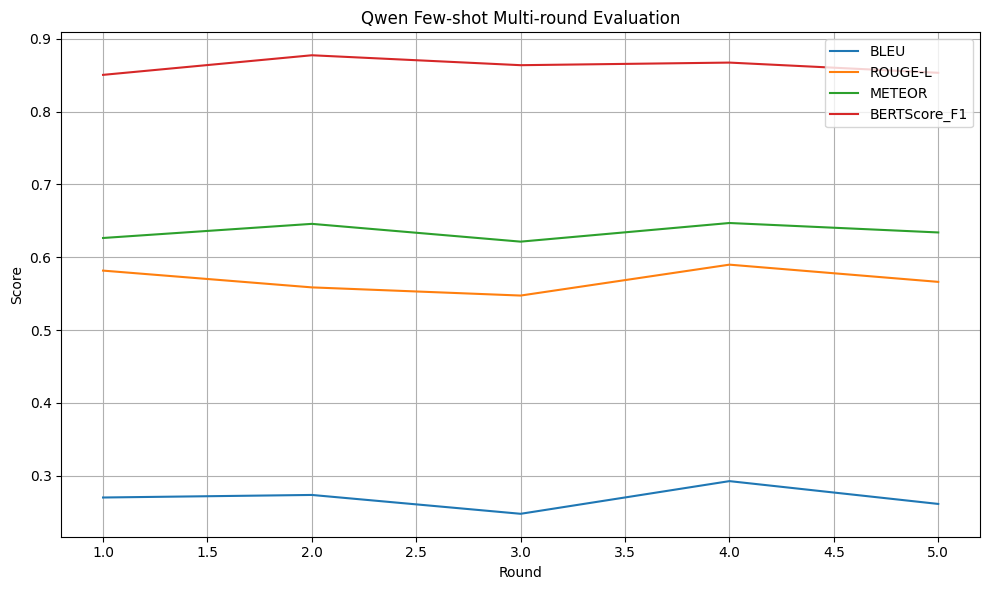


📊 Round 1 Scores:
BLEU: 0.2699
ROUGE-L: 0.5816
METEOR: 0.6264
BERTScore_F1: 0.8505

📊 Round 2 Scores:
BLEU: 0.2734
ROUGE-L: 0.5586
METEOR: 0.6458
BERTScore_F1: 0.8774

📊 Round 3 Scores:
BLEU: 0.2475
ROUGE-L: 0.5473
METEOR: 0.6214
BERTScore_F1: 0.8638

📊 Round 4 Scores:
BLEU: 0.2924
ROUGE-L: 0.5898
METEOR: 0.6470
BERTScore_F1: 0.8673

📊 Round 5 Scores:
BLEU: 0.2611
ROUGE-L: 0.5661
METEOR: 0.6340
BERTScore_F1: 0.8533


In [ ]:
# A
# 85样本，已清洗
# sampled_train.jsonl
# sampled_test.jsonl
# few-shot k=6
# 5 epoch

# ✅ 导入模块
import json
import random
import requests
from tqdm import tqdm
import evaluate
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

# ✅ 读取新数据集（85条完整数据，格式已标准化）
with open("sampled_train.jsonl", "r", encoding="utf-8") as f:
    train_data = [json.loads(line) for line in f]
with open("sampled_test.jsonl", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

# ✅ Qwen API
QWEN_API_KEY = "sk-"
QWEN_API_URL = "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation"

# ✅ 构造few-shot prompt（每轮 k=6 条）
def build_few_shot_messages(k=6):
    examples = random.sample(train_data, k)
    messages = [{
        "role": "system",
        "content": "You are a music cognition expert. Convert restaurant scene descriptions into MusicGen-style music prompts. Describe BPM, genre, mood, key, instrumentation."
    }]
    for ex in examples:
        messages.append({"role": "user", "content": f"Scene: {ex['scene']}"})
        messages.append({"role": "assistant", "content": ex['music']})
    return messages

# ✅ 调用Qwen
def generate_music_description(scene_desc, k=6):
    messages = build_few_shot_messages(k)
    messages.append({"role": "user", "content": f"Scene: {scene_desc}"})

    headers = {
        "Authorization": f"Bearer {QWEN_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "qwen2.5-14b-instruct",
        "input": {"messages": messages},
        "parameters": {"temperature": 0.5, "max_tokens": 150}
    }
    response = requests.post(QWEN_API_URL, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json().get("output", {}).get("text", "").strip()
    else:
        return "ERROR"

# ✅ 多轮验证（默认 epochs = 5 轮）
epochs = 5
results_by_round = []

for round_idx in range(epochs):
    print(f"\n🚀 Round {round_idx + 1}/{epochs}")
    round_results = []
    for sample in tqdm(test_data):
        pred = generate_music_description(sample["scene"], k=10)
        round_results.append({
            "scene": sample["scene"],
            "reference": sample["music"],
            "prediction": pred
        })

    references = [x["reference"] for x in round_results]
    predictions = [x["prediction"] for x in round_results]

    rouge = evaluate.load("rouge")
    meteor = evaluate.load("meteor")
    bertscore = evaluate.load("bertscore")

    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    rouge_result = rouge.compute(predictions=predictions, references=references)
    meteor_result = meteor.compute(predictions=predictions, references=references)
    bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
    avg_bertscore_f1 = sum(bertscore_result["f1"]) / len(bertscore_result["f1"])

    results_by_round.append({
        "BLEU": avg_bleu,
        "ROUGE-L": rouge_result["rougeL"],
        "METEOR": meteor_result["meteor"],
        "BERTScore_F1": avg_bertscore_f1
    })

# ✅ 可视化
rounds = list(range(1, epochs + 1))
plt.figure(figsize=(10, 6))
for metric in ["BLEU", "ROUGE-L", "METEOR", "BERTScore_F1"]:
    scores = [res[metric] for res in results_by_round]
    plt.plot(rounds, scores, label=metric)

plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Qwen Few-shot Multi-round Evaluation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 输出每轮得分
for idx, scores in enumerate(results_by_round):
    print(f"\n📊 Round {idx + 1} Scores:")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")


🚀 Round 1/5


100%|██████████| 21/21 [01:41<00:00,  4.83s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 2/5


100%|██████████| 21/21 [01:44<00:00,  4.97s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 3/5


100%|██████████| 21/21 [01:47<00:00,  5.10s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 4/5


100%|██████████| 21/21 [01:46<00:00,  5.06s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 5/5


100%|██████████| 21/21 [01:50<00:00,  5.26s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


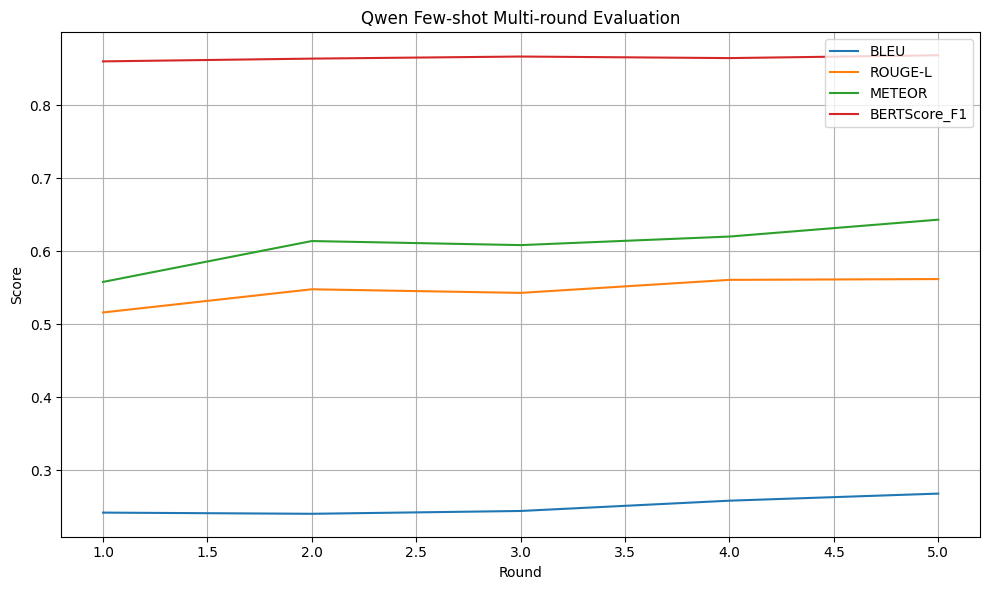


📊 Round 1 Scores:
BLEU: 0.2418
ROUGE-L: 0.5160
METEOR: 0.5579
BERTScore_F1: 0.8600

📊 Round 2 Scores:
BLEU: 0.2402
ROUGE-L: 0.5478
METEOR: 0.6139
BERTScore_F1: 0.8638

📊 Round 3 Scores:
BLEU: 0.2441
ROUGE-L: 0.5429
METEOR: 0.6083
BERTScore_F1: 0.8667

📊 Round 4 Scores:
BLEU: 0.2582
ROUGE-L: 0.5607
METEOR: 0.6200
BERTScore_F1: 0.8645

📊 Round 5 Scores:
BLEU: 0.2679
ROUGE-L: 0.5618
METEOR: 0.6431
BERTScore_F1: 0.8684


In [ ]:
# B
# 205样本，已清洗
# data4_ending_please_train.jsonl
# data4_ending_please_test.jsonl
# few-shot k=6
# 5 epoch

# ✅ 导入模块
import json
import random
import requests
from tqdm import tqdm
import evaluate
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

# ✅ 读取新数据集（205条完整数据，格式已标准化）
with open("data4_ending_please_train.jsonl", "r", encoding="utf-8") as f:
    train_data = [json.loads(line) for line in f]
with open("data4_ending_please_test.jsonl", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

# ✅ Qwen API设置
QWEN_API_KEY = "sk-"
QWEN_API_URL = "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation"

# ✅ 构造few-shot prompt（每轮 k=6 条）
def build_few_shot_messages(k=6):
    examples = random.sample(train_data, k)
    messages = [{
        "role": "system",
        "content": "You are a music cognition expert. Convert restaurant scene descriptions into MusicGen-style music prompts. Describe BPM, genre, mood, key, instrumentation."
    }]
    for ex in examples:
        messages.append({"role": "user", "content": f"Scene: {ex['scene']}"})
        messages.append({"role": "assistant", "content": ex['music']})
    return messages

# ✅ 调用Qwen
def generate_music_description(scene_desc, k=6):
    messages = build_few_shot_messages(k)
    messages.append({"role": "user", "content": f"Scene: {scene_desc}"})
    headers = {
        "Authorization": f"Bearer {QWEN_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "qwen2.5-14b-instruct",
        "input": {"messages": messages},
        "parameters": {"temperature": 0.5, "max_tokens": 150}
    }
    response = requests.post(QWEN_API_URL, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json().get("output", {}).get("text", "").strip()
    else:
        return "ERROR"

# ✅ 多轮验证（默认 5 轮）
epochs = 5
results_by_round = []

for round_idx in range(epochs):
    print(f"\n🚀 Round {round_idx + 1}/{epochs}")
    round_results = []
    for sample in tqdm(test_data):
        pred = generate_music_description(sample["scene"], k=6)
        round_results.append({
            "scene": sample["scene"],
            "reference": sample["music"],
            "prediction": pred
        })

    references = [x["reference"] for x in round_results]
    predictions = [x["prediction"] for x in round_results]

    rouge = evaluate.load("rouge")
    meteor = evaluate.load("meteor")
    bertscore = evaluate.load("bertscore")

    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    rouge_result = rouge.compute(predictions=predictions, references=references)
    meteor_result = meteor.compute(predictions=predictions, references=references)
    bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
    avg_bertscore_f1 = sum(bertscore_result["f1"]) / len(bertscore_result["f1"])

    results_by_round.append({
        "BLEU": avg_bleu,
        "ROUGE-L": rouge_result["rougeL"],
        "METEOR": meteor_result["meteor"],
        "BERTScore_F1": avg_bertscore_f1
    })

# ✅ 可视化
rounds = list(range(1, epochs + 1))
plt.figure(figsize=(10, 6))
for metric in ["BLEU", "ROUGE-L", "METEOR", "BERTScore_F1"]:
    scores = [res[metric] for res in results_by_round]
    plt.plot(rounds, scores, label=metric)

plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Qwen Few-shot Multi-round Evaluation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 输出每轮得分
for idx, scores in enumerate(results_by_round):
    print(f"\n📊 Round {idx + 1} Scores:")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")


🚀 Round 1/5


100%|██████████| 21/21 [01:54<00:00,  5.46s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 2/5


100%|██████████| 21/21 [01:56<00:00,  5.53s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 3/5


100%|██████████| 21/21 [01:52<00:00,  5.37s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 4/5


100%|██████████| 21/21 [01:44<00:00,  5.00s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 5/5


100%|██████████| 21/21 [01:44<00:00,  4.98s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


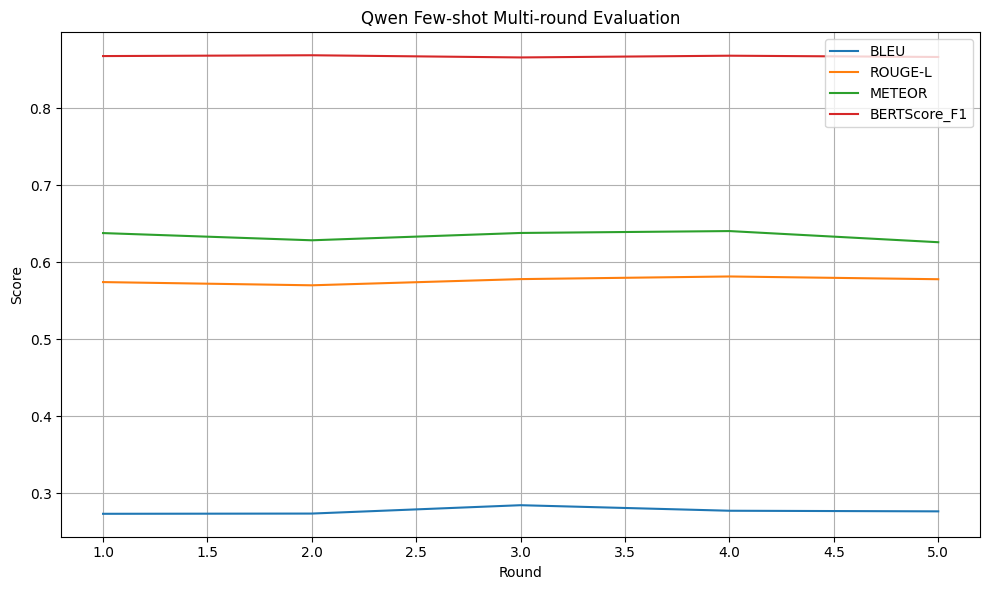


📊 Round 1 Scores:
BLEU: 0.2732
ROUGE-L: 0.5741
METEOR: 0.6377
BERTScore_F1: 0.8676

📊 Round 2 Scores:
BLEU: 0.2735
ROUGE-L: 0.5699
METEOR: 0.6284
BERTScore_F1: 0.8686

📊 Round 3 Scores:
BLEU: 0.2844
ROUGE-L: 0.5780
METEOR: 0.6379
BERTScore_F1: 0.8658

📊 Round 4 Scores:
BLEU: 0.2772
ROUGE-L: 0.5814
METEOR: 0.6403
BERTScore_F1: 0.8680

📊 Round 5 Scores:
BLEU: 0.2764
ROUGE-L: 0.5778
METEOR: 0.6258
BERTScore_F1: 0.8664


In [ ]:
# C
# 205样本，已清洗
# data4_ending_please_train.jsonl
# data4_ending_please_test.jsonl
# few-shot k=10
# 5 epoch

# ✅ 导入模块
import json
import random
import requests
from tqdm import tqdm
import evaluate
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

# ✅ 读取新数据集（205条完整数据，格式已标准化）
with open("data4_ending_please_train.jsonl", "r", encoding="utf-8") as f:
    train_data = [json.loads(line) for line in f]
with open("data4_ending_please_test.jsonl", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

# ✅ Qwen API设置
QWEN_API_KEY = "sk-"
QWEN_API_URL = "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation"

# ✅ 构造few-shot prompt（每轮 k=10 条）
def build_few_shot_messages(k=10):
    examples = random.sample(train_data, k)
    messages = [{
        "role": "system",
        "content": "You are a music cognition expert. Convert restaurant scene descriptions into MusicGen-style music prompts. Describe BPM, genre, mood, key, instrumentation."
    }]
    for ex in examples:
        messages.append({"role": "user", "content": f"Scene: {ex['scene']}"})
        messages.append({"role": "assistant", "content": ex['music']})
    return messages

# ✅ 调用Qwen
def generate_music_description(scene_desc, k=10):
    messages = build_few_shot_messages(k)
    messages.append({"role": "user", "content": f"Scene: {scene_desc}"})
    headers = {
        "Authorization": f"Bearer {QWEN_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "qwen2.5-14b-instruct",
        "input": {"messages": messages},
        "parameters": {"temperature": 0.5, "max_tokens": 150}
    }
    response = requests.post(QWEN_API_URL, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json().get("output", {}).get("text", "").strip()
    else:
        return "ERROR"

# ✅ 多轮验证（默认 5 轮）
epochs = 5
results_by_round = []

for round_idx in range(epochs):
    print(f"\n🚀 Round {round_idx + 1}/{epochs}")
    round_results = []
    for sample in tqdm(test_data):
        pred = generate_music_description(sample["scene"], k=10)
        round_results.append({
            "scene": sample["scene"],
            "reference": sample["music"],
            "prediction": pred
        })

    references = [x["reference"] for x in round_results]
    predictions = [x["prediction"] for x in round_results]

    rouge = evaluate.load("rouge")
    meteor = evaluate.load("meteor")
    bertscore = evaluate.load("bertscore")

    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    rouge_result = rouge.compute(predictions=predictions, references=references)
    meteor_result = meteor.compute(predictions=predictions, references=references)
    bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
    avg_bertscore_f1 = sum(bertscore_result["f1"]) / len(bertscore_result["f1"])

    results_by_round.append({
        "BLEU": avg_bleu,
        "ROUGE-L": rouge_result["rougeL"],
        "METEOR": meteor_result["meteor"],
        "BERTScore_F1": avg_bertscore_f1
    })

# ✅ 可视化
rounds = list(range(1, epochs + 1))
plt.figure(figsize=(10, 6))
for metric in ["BLEU", "ROUGE-L", "METEOR", "BERTScore_F1"]:
    scores = [res[metric] for res in results_by_round]
    plt.plot(rounds, scores, label=metric)

plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Qwen Few-shot Multi-round Evaluation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 输出每轮得分
for idx, scores in enumerate(results_by_round):
    print(f"\n📊 Round {idx + 1} Scores:")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")


🚀 Round 1/10


100%|██████████| 21/21 [01:50<00:00,  5.24s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 2/10


100%|██████████| 21/21 [01:41<00:00,  4.84s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 3/10


100%|██████████| 21/21 [01:51<00:00,  5.29s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 4/10


100%|██████████| 21/21 [01:52<00:00,  5.37s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 5/10


100%|██████████| 21/21 [01:54<00:00,  5.45s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 6/10


100%|██████████| 21/21 [01:58<00:00,  5.65s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 7/10


100%|██████████| 21/21 [01:39<00:00,  4.74s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 8/10


100%|██████████| 21/21 [01:45<00:00,  5.00s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 9/10


100%|██████████| 21/21 [01:46<00:00,  5.05s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 10/10


100%|██████████| 21/21 [01:46<00:00,  5.09s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


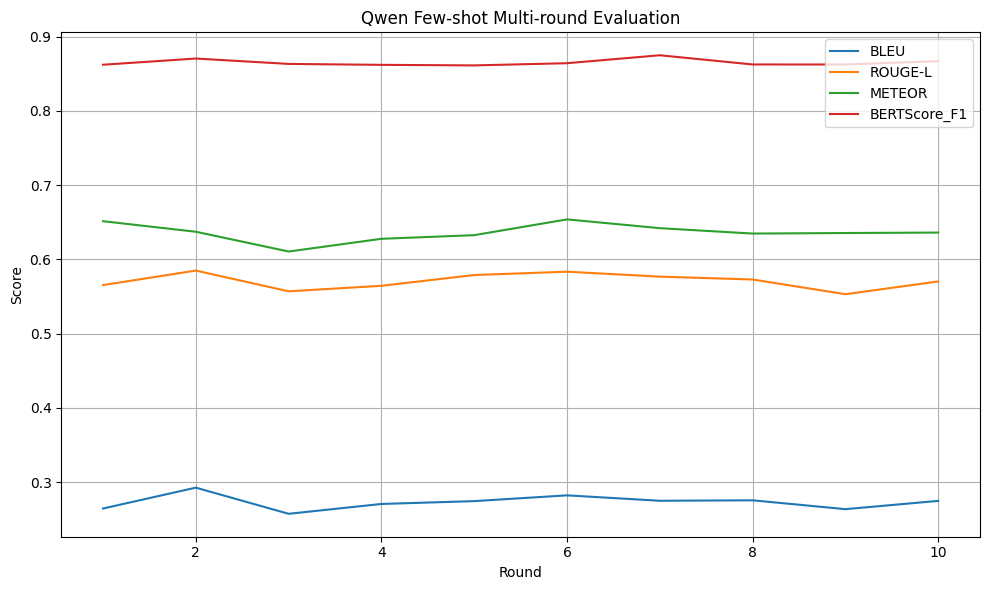


📊 Round 1 Scores:
BLEU: 0.2646
ROUGE-L: 0.5655
METEOR: 0.6516
BERTScore_F1: 0.8623

📊 Round 2 Scores:
BLEU: 0.2927
ROUGE-L: 0.5851
METEOR: 0.6373
BERTScore_F1: 0.8706

📊 Round 3 Scores:
BLEU: 0.2575
ROUGE-L: 0.5571
METEOR: 0.6107
BERTScore_F1: 0.8634

📊 Round 4 Scores:
BLEU: 0.2708
ROUGE-L: 0.5646
METEOR: 0.6279
BERTScore_F1: 0.8621

📊 Round 5 Scores:
BLEU: 0.2746
ROUGE-L: 0.5791
METEOR: 0.6328
BERTScore_F1: 0.8614

📊 Round 6 Scores:
BLEU: 0.2824
ROUGE-L: 0.5835
METEOR: 0.6540
BERTScore_F1: 0.8643

📊 Round 7 Scores:
BLEU: 0.2751
ROUGE-L: 0.5769
METEOR: 0.6422
BERTScore_F1: 0.8750

📊 Round 8 Scores:
BLEU: 0.2757
ROUGE-L: 0.5730
METEOR: 0.6349
BERTScore_F1: 0.8626

📊 Round 9 Scores:
BLEU: 0.2637
ROUGE-L: 0.5532
METEOR: 0.6356
BERTScore_F1: 0.8626

📊 Round 10 Scores:
BLEU: 0.2749
ROUGE-L: 0.5704
METEOR: 0.6362
BERTScore_F1: 0.8671


In [ ]:
# D
# 185样本，已清洗
# data4_ending_please_train.jsonl
# data4_ending_please_test.jsonl
# few-shot k=10
# 10 epoch

# ✅ 导入模块
import json
import random
import requests
from tqdm import tqdm
import evaluate
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

# ✅ 读取新数据集（205条完整数据，格式已标准化）
with open("data4_ending_please_train.jsonl", "r", encoding="utf-8") as f:
    train_data = [json.loads(line) for line in f]
with open("data4_ending_please_test.jsonl", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

# ✅ Qwen API
QWEN_API_KEY = "sk-"
QWEN_API_URL = "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation"

# ✅ 构造few-shot prompt（每轮 k=10 条）
def build_few_shot_messages(k=10):
    examples = random.sample(train_data, k)
    messages = [{
        "role": "system",
        "content": "You are a music cognition expert. Convert restaurant scene descriptions into MusicGen-style music prompts. Describe BPM, genre, mood, key, instrumentation."
    }]
    for ex in examples:
        messages.append({"role": "user", "content": f"Scene: {ex['scene']}"})
        messages.append({"role": "assistant", "content": ex['music']})
    return messages

# ✅ 调用Qwen
def generate_music_description(scene_desc, k=10):
    messages = build_few_shot_messages(k)
    messages.append({"role": "user", "content": f"Scene: {scene_desc}"})
    headers = {
        "Authorization": f"Bearer {QWEN_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "qwen2.5-14b-instruct",
        "input": {"messages": messages},
        "parameters": {"temperature": 0.5, "max_tokens": 150}
    }
    response = requests.post(QWEN_API_URL, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json().get("output", {}).get("text", "").strip()
    else:
        return "ERROR"

# ✅ 多轮验证（10轮）
epochs = 10
results_by_round = []

for round_idx in range(epochs):
    print(f"\n🚀 Round {round_idx + 1}/{epochs}")
    round_results = []
    for sample in tqdm(test_data):
        pred = generate_music_description(sample["scene"], k=10)
        round_results.append({
            "scene": sample["scene"],
            "reference": sample["music"],
            "prediction": pred
        })

    references = [x["reference"] for x in round_results]
    predictions = [x["prediction"] for x in round_results]

    rouge = evaluate.load("rouge")
    meteor = evaluate.load("meteor")
    bertscore = evaluate.load("bertscore")

    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    rouge_result = rouge.compute(predictions=predictions, references=references)
    meteor_result = meteor.compute(predictions=predictions, references=references)
    bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
    avg_bertscore_f1 = sum(bertscore_result["f1"]) / len(bertscore_result["f1"])

    results_by_round.append({
        "BLEU": avg_bleu,
        "ROUGE-L": rouge_result["rougeL"],
        "METEOR": meteor_result["meteor"],
        "BERTScore_F1": avg_bertscore_f1
    })

# ✅ 可视化
rounds = list(range(1, epochs + 1))
plt.figure(figsize=(10, 6))
for metric in ["BLEU", "ROUGE-L", "METEOR", "BERTScore_F1"]:
    scores = [res[metric] for res in results_by_round]
    plt.plot(rounds, scores, label=metric)

plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Qwen Few-shot Multi-round Evaluation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 输出每轮得分
for idx, scores in enumerate(results_by_round):
    print(f"\n📊 Round {idx + 1} Scores:")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")


🚀 Round 1/5


100%|██████████| 21/21 [01:39<00:00,  4.72s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 2/5


100%|██████████| 21/21 [01:39<00:00,  4.74s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 3/5


100%|██████████| 21/21 [01:42<00:00,  4.90s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 4/5


100%|██████████| 21/21 [01:38<00:00,  4.69s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Round 5/5


100%|██████████| 21/21 [01:34<00:00,  4.48s/it]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


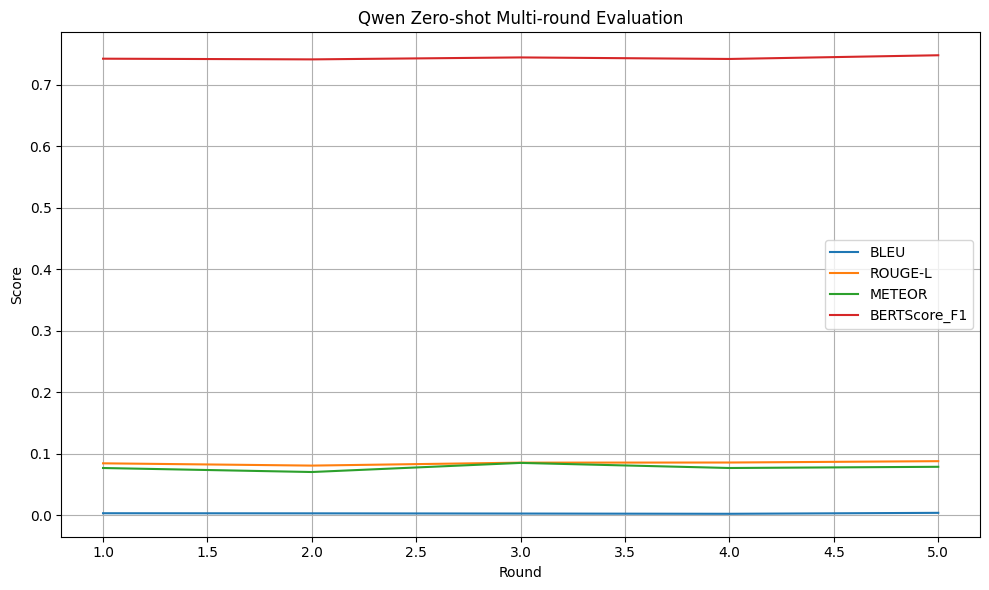


📊 Round 1 Scores:
BLEU: 0.0033
ROUGE-L: 0.0844
METEOR: 0.0768
BERTScore_F1: 0.7421

📊 Round 2 Scores:
BLEU: 0.0031
ROUGE-L: 0.0807
METEOR: 0.0703
BERTScore_F1: 0.7409

📊 Round 3 Scores:
BLEU: 0.0028
ROUGE-L: 0.0855
METEOR: 0.0851
BERTScore_F1: 0.7441

📊 Round 4 Scores:
BLEU: 0.0024
ROUGE-L: 0.0857
METEOR: 0.0768
BERTScore_F1: 0.7416

📊 Round 5 Scores:
BLEU: 0.0039
ROUGE-L: 0.0879
METEOR: 0.0788
BERTScore_F1: 0.7476


In [ ]:
# E zero-shot
# 205样本，已清洗
# data4_ending_please_test.jsonl
# few-shot k=10
# 5 epoch

# ✅ 导入模块
import json
import requests
from tqdm import tqdm
import evaluate
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

# ✅ 读取新数据集（205条完整数据，格式已标准化）
with open("data4_ending_please_test.jsonl", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

# ✅ Qwen API
QWEN_API_KEY = "sk-"
QWEN_API_URL = "https://dashscope.aliyuncs.com/api/v1/services/aigc/text-generation/generation"

# ✅ Zero-shot构造零样本提示
ZERO_SHOT_PROMPT = "You are a music cognition expert. Convert the following restaurant scene description into a MusicGen-style music prompt. Describe BPM, genre, mood, key, instrumentation."

# ✅ 调用Qwen
def generate_music_description_zero_shot(scene_desc):
    messages = [
        {"role": "system", "content": ZERO_SHOT_PROMPT},
        {"role": "user", "content": f"Scene: {scene_desc}"}
    ]
    headers = {
        "Authorization": f"Bearer {QWEN_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "qwen2.5-14b-instruct",
        "input": {"messages": messages},
        "parameters": {"temperature": 0.5, "max_tokens": 150}
    }
    response = requests.post(QWEN_API_URL, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json().get("output", {}).get("text", "").strip()
    else:
        return "ERROR"

# ✅ 多轮验证（默认 5 轮）
epochs = 5
results_by_round = []

for round_idx in range(epochs):
    print(f"\n🚀 Round {round_idx + 1}/{epochs}")
    round_results = []
    for sample in tqdm(test_data):
        pred = generate_music_description_zero_shot(sample["scene"])
        round_results.append({
            "scene": sample["scene"],
            "reference": sample["music"],
            "prediction": pred
        })

    references = [x["reference"] for x in round_results]
    predictions = [x["prediction"] for x in round_results]

    rouge = evaluate.load("rouge")
    meteor = evaluate.load("meteor")
    bertscore = evaluate.load("bertscore")

    smoothie = SmoothingFunction().method4
    bleu_scores = [sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie) for ref, pred in zip(references, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    rouge_result = rouge.compute(predictions=predictions, references=references)
    meteor_result = meteor.compute(predictions=predictions, references=references)
    bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
    avg_bertscore_f1 = sum(bertscore_result["f1"]) / len(bertscore_result["f1"])

    results_by_round.append({
        "BLEU": avg_bleu,
        "ROUGE-L": rouge_result["rougeL"],
        "METEOR": meteor_result["meteor"],
        "BERTScore_F1": avg_bertscore_f1
    })

# ✅ 可视化
rounds = list(range(1, epochs + 1))
plt.figure(figsize=(10, 6))
for metric in ["BLEU", "ROUGE-L", "METEOR", "BERTScore_F1"]:
    scores = [res[metric] for res in results_by_round]
    plt.plot(rounds, scores, label=metric)

plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Qwen Zero-shot Multi-round Evaluation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 输出每轮得分
for idx, scores in enumerate(results_by_round):
    print(f"\n📊 Round {idx + 1} Scores:")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")
